<a href="https://colab.research.google.com/github/zlnvsky/project_datacamp/blob/main/Certification_Data_Analyst_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Introduction**

Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.

_**Email**_: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.

_**Call**_: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.

_**Email and call**:_ Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

In [ ]:
# Libraries importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.3 MB/s eta 0:00:00


In [ ]:
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data validation**

In [ ]:
# Reading required dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataCamp Certification/product_sales.csv')

## **1.1 Overall data info**

In [ ]:
# Checking data info and shape
print(df.shape)
print(df.info())
df.head()

(15000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [ ]:
# Checking descriptive statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,15000.0,3.098267,1.656420,1.00,2.00,3.0,5.0000,6.00
nb_sold,15000.0,10.084667,1.812213,7.00,9.00,10.0,11.0000,16.00
revenue,13926.0,93.934943,47.435312,32.54,52.47,89.5,107.3275,238.32
years_as_customer,15000.0,4.965933,5.044952,0.00,1.00,3.0,7.0000,63.00
nb_site_visits,15000.0,24.990867,3.500914,12.00,23.00,25.0,27.0000,41.00


In [ ]:
# Checking for duplicates
df[df.duplicated()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


## **1.2 NaNs and categorical data**

In [ ]:
# Checking NaN values in columns
print(df.isna().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [ ]:
# Checking comparison of the 'revenue' column for the 5% rule
list(df.columns[df.isna().sum() > len(df) * 0.05])

['revenue']

In [ ]:
# Checking the number of unique values in columns with 'object' datatype
non_num = list(df.columns[df.dtypes == 'object'])

for i in non_num:
    nunique = df[i].nunique()
    print(f'There is {nunique} in {i} column')

There is 5 in sales_method column
There is 15000 in customer_id column
There is 50 in state column


In [ ]:
# Checking 'sales_method' columns for the unique values to help fill NaN values in 'revenue' later
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [ ]:
# Fixing data in the 'sales_method' column
map_list = {
    'Email' : 'Email',
    'Email + Call' : 'Email + Call',
    'Call' : 'Call',
    'email' : 'Email',
    'em + call' : 'Email + Call'}

df['sales_method'] = df['sales_method'].map(map_list)

print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [ ]:
# Filling NaN values in 'revenue' column
mean_by_sm = df.groupby('sales_method')['revenue'].mean()
df['revenue'] = df['revenue'].fillna(df['sales_method'].map(mean_by_sm))

df.isna().sum()

,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,0
years_as_customer,0
nb_site_visits,0
state,0


In [ ]:
# Changing 'sales_method' and 'state' columns as 'category' datatype
df[['sales_method', 'state']] = df[['sales_method', 'state']].astype('category')
df.dtypes

,0
week,int64
sales_method,category
customer_id,object
nb_sold,int64
revenue,float64
years_as_customer,int64
nb_site_visits,int64
state,category


## **1.3 Numeric data**

In [ ]:
# Rounding 'revenue' column to 2 decimal places
df['revenue'] = df['revenue'].round(2)

<Axes: >

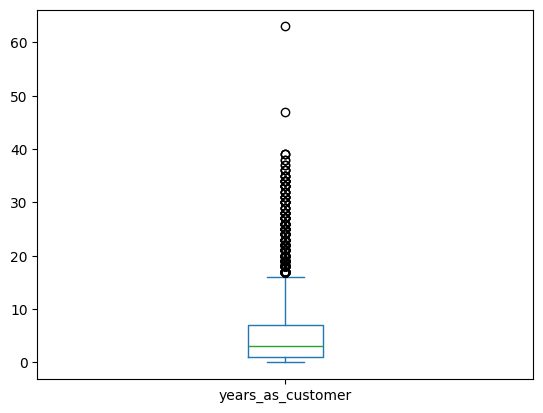

In [ ]:
# Visualizing 'years_as_customer' with a boxplot to detect outliers
df['years_as_customer'].plot(kind='box')

In [ ]:
# Searching for and removing outliers in the 'years_as_customer' column
threshold = 2025 - 1984
outliers = df[df['years_as_customer'] > threshold]

df = df[~df.index.isin(outliers.index)]

## **1.4 Data validation summary**

The original dataset contains **15,000 rows and 8 columns**, with **no duplicate records**. Each column was validated according to its description in the data dictionary:

- **week (int)** – No missing values. Matches expected format. **No cleaning required.**

- **sales_method (object)** – No missing values. Initially contains 5 unique values: `'Email'`, `'Call'`, `'Email + Call'`, `'em + call'`, `'email'`.  
  After normalization (case and spelling), the column contains 3 consistent groups: `'Email'`, `'Call'`, `'Email + Call'`.

- **customer_id (object)** – No missing values. Matches the description. **No cleaning required.**

- **nb_sold (int)** – No missing values. Matches the description. **No cleaning required.**

- **revenue (float)** – Contains **1,074 missing values** (~7.2% of total).  
  Since this exceeds 5% of the dataset and could result in information loss, missing values were filled with the **mean revenue within each sales method group**.

- **years_as_customer (int)** – Contains **2 extreme outliers**.  
  Due to their apparent randomness and lack of further context, these records were removed.

- **nb_site_visits (int)** – No missing values. Matches the description. **No cleaning required.**

- **state (object)** – No missing values. Matches the description. **No cleaning required.**

---

**Final dataset:** 14,998 rows, 8 columns.  
**No missing values.** Cleaned and ready for analysis.


# **2. Data manipulation**

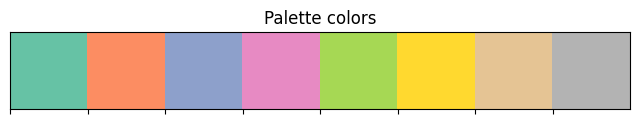

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [ ]:
# Choosing a color palette
colors = sns.color_palette('Set2', n_colors=8)

sns.palplot(colors)
plt.title('Palette colors')
plt.show()

print(sns.color_palette('Set2', 8).as_hex())

In [ ]:
order = list(df['sales_method'].cat.remove_unused_categories().value_counts().index)

palette = {
    'Email': '#66c2a5',
    'Call': '#fc8d62',
    'Email + Call': '#8da0cb'
}

## **2.1 Correlation and data heatmap**

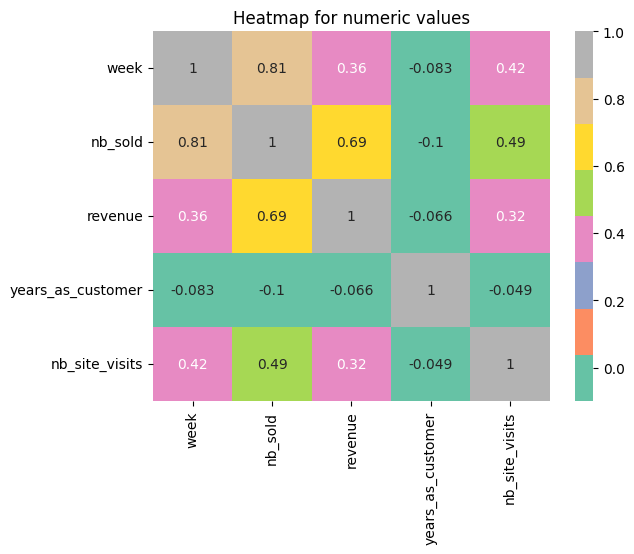

In [ ]:
# Plotting heatmap to check available correlations
df_num = df.select_dtypes(['int', 'float'])
corr = df_num.corr()

sns.heatmap(corr, annot=True, cmap=colors)
plt.title('Heatmap for numeric values')

plt.show()

The heatmap reveals two notable positive correlations. A moderate positive correlation (0.69) is observed between `'nb_sold'` and `'revenue'`, indicating that an increase in the number of items sold tends to coincide with higher revenue. A stronger positive correlation (0.81) is found between `'nb_sold'` and `'week'`, suggesting a trend of increasing sales volume over time.

## **2.2 Number of customers by sales method**

In [ ]:
cust_per_method = df['sales_method'].value_counts()\
                    .reset_index(name='customers')\
                    .rename(columns={'index' : 'sales_method',})

display(cust_per_method)

,sales_method,customers
0,Email,7465
1,Call,4961
2,Email + Call,2572


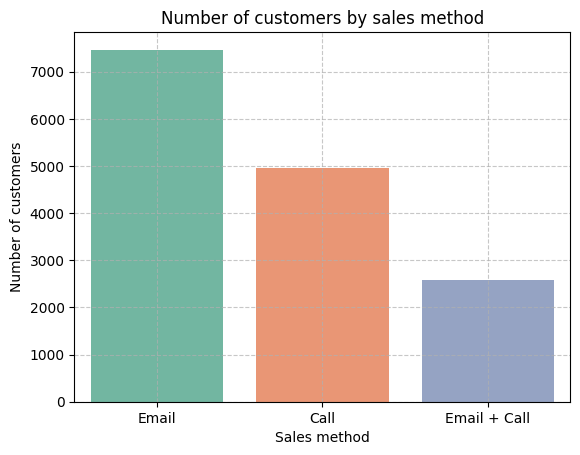

In [ ]:
order = list(df['sales_method'].cat.remove_unused_categories().value_counts().index)
# palette = sns.color_palette('Set2', n_colors=len(order))[::-1]

sns.countplot(
    x='sales_method',
    data=df,
    hue='sales_method',
    order=order,
    palette=palette,
    legend=False
)

plt.xlabel('Sales method')
plt.ylabel('Number of customers')
plt.title('Number of customers by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

The bar plot indicates that the majority of customers engaged through the `'Email'` sales method. The `'Call'` method ranks second in customer count, followed by the combined `'Email + Call'` approach.

## **2.3 Revenue spread: overall and by group**

### **2.3.1 Overall revenue distribution**

In [ ]:
# Descriptive statistics for 'revenue' column
display(round(df['revenue'].describe(), 2))

,revenue
count,14998.00
mean,95.58
std,47.96
min,32.54
25%,52.65
50%,90.95
75%,107.75
max,238.32


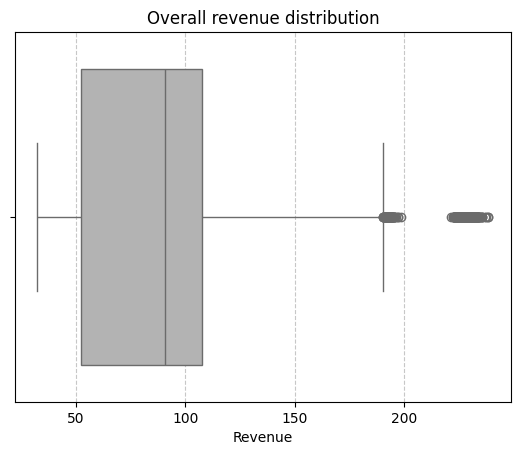

In [ ]:
# Boxplot for overall revenue distribution
sns.boxplot(x='revenue', data=df, color='#b3b3b3')

plt.xlabel('Revenue')
plt.ylabel('')
plt.title('Overall revenue distribution')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Based on the overall revenue distribution box plot, we can conclude that the **median** `'revenue'` is **90.95**, with the **25th and 75th percentiles** at **52.65 and 107.75**, respectively.
Additionally, there are many outliers present, so I will perform a separate analysis to further investigate them.

### **2.3.2. Revenue distibution by sales method**

In [ ]:
df.groupby('sales_method')['revenue'].describe().T

/tmp/ipython-input-61-3314805286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sales_method')['revenue'].describe().T


sales_method,Call,Email,Email + Call
count,4961.000000,7465.000000,2572.000000
mean,47.596980,97.127841,183.651065
std,8.452129,10.794994,27.037965
min,32.540000,78.830000,122.110000
25%,41.630000,88.390000,176.437500
50%,47.600000,96.830000,183.650000
75%,52.590000,104.460000,189.535000
max,71.360000,148.970000,238.320000


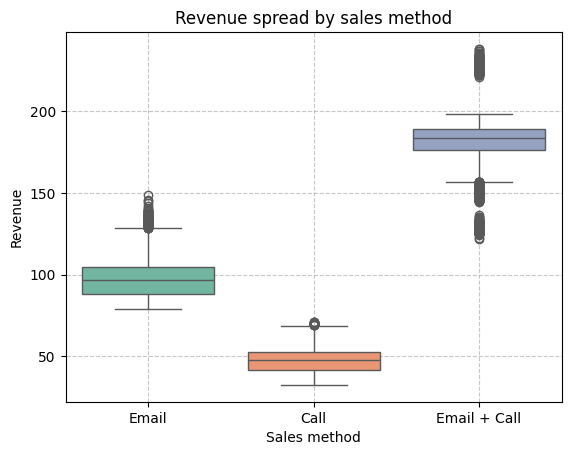

In [ ]:
# Boxplot for distribution by sales method
sns.boxplot(
    x='sales_method',
    y='revenue',
    data=df,
    hue='sales_method',
    order=order,
    palette=palette
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Revenue spread by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Based on the box plot showing revenue distribution by sales method, we can conclude that there are noticeable differences between the groups.
The **'Email + Call'** method has the highest revenue, followed by **'Email'**, while **'Call'** shows the lowest revenue overall.
The mixed method also has many outliers on both sides, and notably, all high-revenue outliers are found only in this group.

## **2.4 Revenue over weeks by sales method**

In [ ]:
df_rev_by_week = df.groupby(['sales_method', 'week'], as_index=False, observed=False)['revenue'].sum()\
                    .pivot(index='sales_method', columns='week', values='revenue')

df_rev_by_week['total'] = df_rev_by_week.sum(axis=1)
df_rev_by_week

week,1,2,3,4,5,6,total
sales_method,,,,,,,
Call,27015.98,35220.02,37865.67,51495.12,55279.31,29252.52,236128.62
Email,248123.12,148381.52,107048.19,116044.42,80201.25,25260.83,725059.33
Email + Call,20007.38,31702.08,55164.89,89682.50,147194.87,128598.82,472350.54


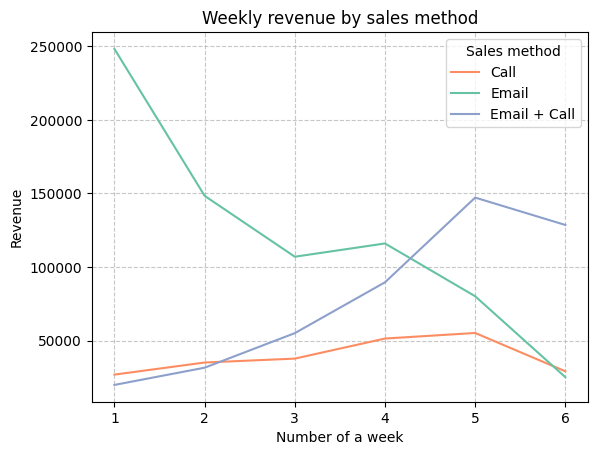

In [ ]:
# Lineplot over time by sales method
sns.lineplot(
    x='week',
    y='revenue',
    data=df,
    hue='sales_method',
    legend=True,
    palette=palette,
    errorbar=None,
    estimator='sum'
)

plt.legend(title='Sales method')
plt.xlabel('Number of a week')
plt.ylabel('Revenue')
plt.title('Weekly revenue by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Based on the weekly revenue line plot by sales method, we can conclude that the **‘Email’** group experienced a significant decline over the 6-week period — its revenue dropped almost **tenfold**, from **248,123.12** in week 1 to **29,252.52** in week 6.

The **‘Email + Call’** group started with **20,007.38** in week 1 and showed a **gradual increase** over the following weeks, peaking in **week 5** at **147,194.87**, before slightly declining to **128,598.82** in week 6.

The **‘Call’** group followed a similar trend to the mixed group, though at a smaller scale. It started at **27,015.98** in week 1, reached its peak in **week 5** at **55,279.31**, and ended at **29,252.52** in week 6.


## **2.5 Additional data exploration**

In [ ]:
# Total revenue per sales method
rev_by_sm = df.groupby('sales_method', observed=False, as_index=False)['revenue'].sum()
rev_by_sm['revenue'] = rev_by_sm['revenue'].round(2)

# Number of customers (observations) per sales method
rev_by_sm['num_c'] = rev_by_sm['sales_method'].map(df['sales_method'].value_counts())\
                        .astype(int)

# Average revenue per customer (ARPU) per sales method
rev_by_sm['rev_per_cust'] = round(rev_by_sm['revenue']/rev_by_sm['num_c'], 2)

# Revenue per customer relative to the Email group
rev_by_sm['relative_ratio_email_rpp'] = round(rev_by_sm['rev_per_cust']/rev_by_sm.loc[1, 'rev_per_cust'], 2)

# Total number of items sold per sales method
dfnb = df.groupby('sales_method', observed=False)['nb_sold'].sum()

# Merging with rev_by_sm dataframe
rev_by_sm = pd.merge(rev_by_sm, dfnb, how='inner', left_on='sales_method', right_index=True)

# Average price per sold item
rev_by_sm['avg_price_per_item'] = round(rev_by_sm['revenue']/rev_by_sm['nb_sold'], 2)

# Average number of items sold per customer
rev_by_sm['avg_items_per_cust'] = round(rev_by_sm['nb_sold']/rev_by_sm['num_c'], 2)

# display(rev_by_sm.sort_values('rev_per_cust', ascending=False))
display(rev_by_sm)

,sales_method,revenue,num_c,rev_per_cust,relative_ratio_email_rpp,nb_sold,avg_price_per_item,avg_items_per_cust
0,Call,236128.62,4961,47.60,0.49,47177,5.01,9.51
1,Email,725059.33,7465,97.13,1.00,72629,9.98,9.73
2,Email + Call,472350.54,2572,183.65,1.89,31444,15.02,12.23


In [ ]:
rev_by_sm[['sales_method', 'avg_price_per_item',	'avg_items_per_cust']]

,sales_method,avg_price_per_item,avg_items_per_cust
0,Call,5.01,9.51
1,Email,9.98,9.73
2,Email + Call,15.02,12.23


### **2.5.1 Barplot for overall revenue by sales method**

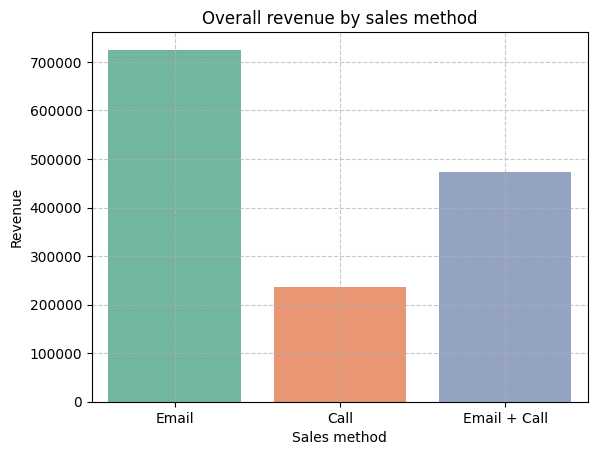

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='revenue',
    data=df,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Overall revenue by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Based on the barplot of total revenue by sales method, we can confidently say that the highest revenue was generated by the **Email** group (**725,059.33**), followed by the **Email + Call** group (**472,350.54**). The **Call** group generated the lowest revenue (**236,128.62**).

However, as we observed earlier in section **2.2 (Number of customers by sales method)**, the **Email** group also had the largest number of customers. This suggests that the high total revenue may be due more to the **size** of the group than the **effectiveness** of the sales method itself.

Therefore, it is necessary to calculate the **average revenue per customer** for each sales method in order to better evaluate performance.


### **2.5.2 Barplot of average revenue per customer (ARPC) by sales method**

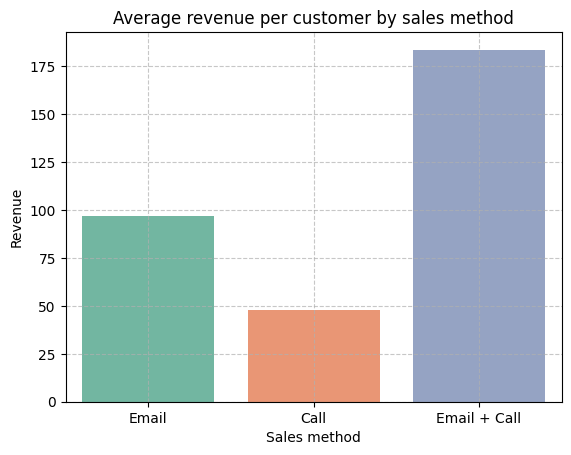

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='rev_per_cust',
    data=rev_by_sm,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Average revenue per customer by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Based on the barplot in section **2.5.3**, we can see that the highest average revenue per customer comes from the **Email + Call** group (**183.65**).

It is followed by the **Email** group (**97.13**) and, lastly, the **Call** group (**47.60**).

### **2.5.3 Barplot of relative revenue by sales method compared to Email group**

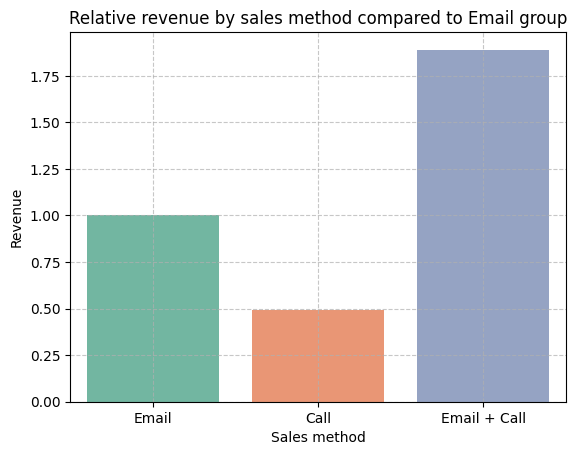

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='relative_ratio_email_rpp',
    data=rev_by_sm,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Relative revenue by sales method compared to Email group')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

This barplot shows the relative average revenue per customer compared to the **Email** group (**1.00**):

- The **Email + Call** group shows a relative value of **1.89**, meaning that, on average, one customer in this group brings in **1.9 times more revenue** than a customer in the Email group.
- Compared to the **Call** group (**0.49**), customers in the **Email + Call** group generate **almost 3.9 times more revenue** per person.
- The **Call** group also brings in **about 2 times less revenue** per customer than the **Email** group.

This confirms that the **most effective sales method**, based on average revenue per customer, is the **Email + Call** strategy.

### **2.5.4 Boxplot for the distribution of sold products by sales method**

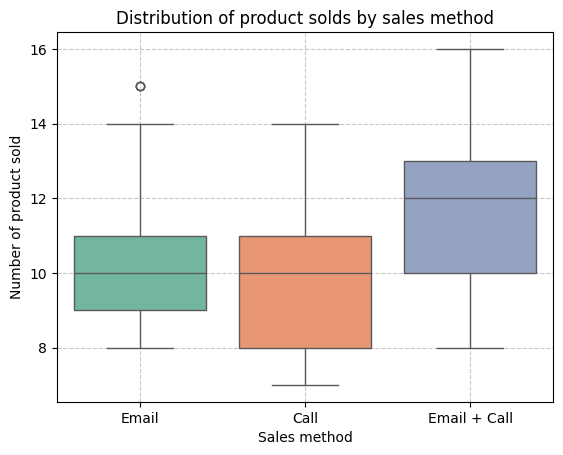

In [ ]:
# Plotting a boxplot
sns.boxplot(
    x='sales_method',
    y='nb_sold',
    data=df,
    hue='sales_method',
    order=order,
    palette=palette
)

plt.xlabel('Sales method')
plt.ylabel('Number of product sold')
plt.title('Distribution of product solds by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

From the boxplot of the number of products sold per sales method, we can observe the following:

- The **median** in the **"Email + Call"** group is **2 units higher** than in the **"Email"** and **"Call"** groups.
- The **interquartile range (IQR)** in the **"Email + Call"** group is **3** (75th percentile = 13, 25th = 10), which is larger than in the other groups:
  - **"Email"**: IQR = 11 - 9 = **2**
  - **"Call"**: IQR = 11 - 8 = **3**, but the median is lower.
- The **"Email"** group contains **one outlier** with **15 products sold**.

These results indicate that the **combined "Email + Call" sales strategy** leads to the **highest number of products sold per customer on average**.

This is further supported by the **positive correlation between `nb_sold` and `revenue`**, as seen in the **2.1 Correlation and data heatmap** — suggesting that higher product sales are associated with increased revenue.

### **2.5.5 Barplot of numbers sold items**

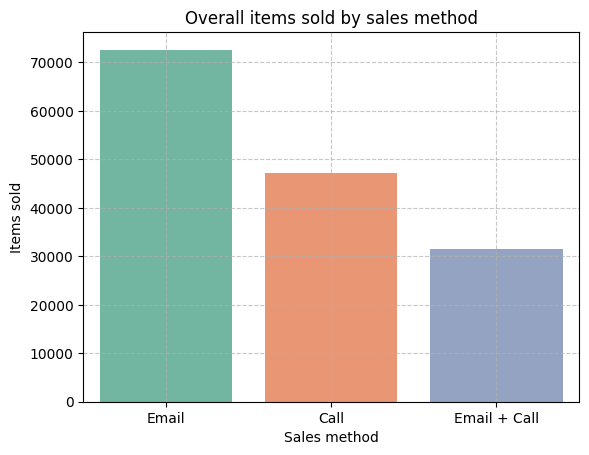

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='nb_sold',
    data=df,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Items sold')
plt.title('Overall items sold by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

The highest number of items sold was observed in the **Email** group (**72,629** items),  
followed by the **Call** group (**47,177** items).  
The lowest number of items sold was recorded in the **Email + Call** group (**31,444** items).


### **2.5.6 Barplot of average price per item by sales method**

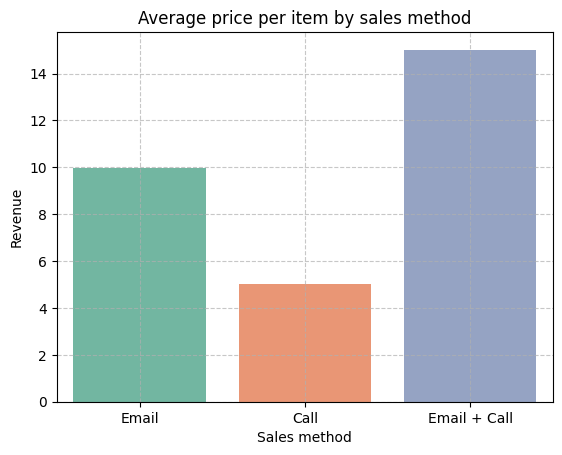

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='avg_price_per_item',
    data=rev_by_sm,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Average price per item by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Customers in the **Email + Call** group purchased **fewer items**,  
but at a **higher average price** (**15.02**), compared to the **Email** group (**9.98**) and the **Call** group (lowest).

This may indicate a stronger interest in **higher-value products** within the **Email + Call** group.  
However, it could also suggest that the **combined communication channel** was **more effective** at conveying the **value proposition** of the new product line.

In contrast, the lower average price per item observed in the **Call** and **Email** groups  
may reflect either different customer preferences **or** **less effective communication**,  
possibly leading to lower perceived value and focus on cheaper items.

### **2.5.7 Barplot of average items sold per customer by sales method**

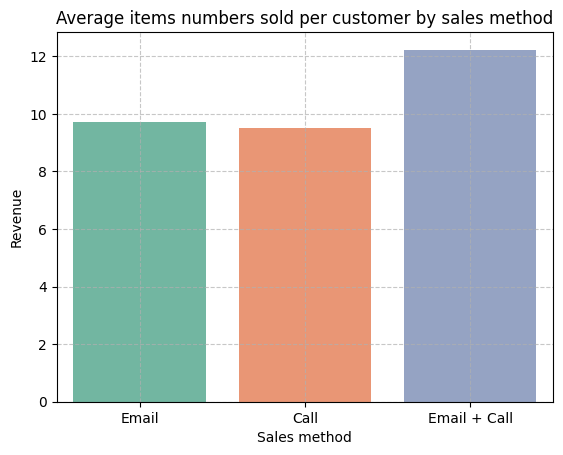

In [ ]:
# Plotting the barplot
sns.barplot(
    x='sales_method',
    y='avg_items_per_cust',
    data=rev_by_sm,
    hue='sales_method',
    order=order,
    palette=palette,
    estimator='sum',
    errorbar=None
)

plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Average items numbers sold per customer by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

According to the plot, customers in the **Email + Call** group purchased the highest average number of items (**12.23**),  
compared to the **Email** group (**9.73**) and the **Call** group (**9.51**).

This indicates that despite having a **smaller number of customers**,  
the **Email + Call** group achieved a **higher average number of items sold per customer** than the other groups.

When combined with previous findings from sections **2.5.3 (ARPU)** and **2.5.7 (Average Price per Item)**,  
the **Email + Call** strategy appears to be the **most promising** in terms of both **customer value** and **sales efficiency**.


### **2.5.8 Detecting high-revenue clients**

In [ ]:
# 25/75 quantiles
low = df['revenue'].quantile(.25)
high = df['revenue'].quantile(.75)

# IQR
IQR = high - low

# Upper outlier point
upper = high + IQR*1.5

# Detecting upper outliers
outliers = df[df['revenue'] >= upper]

# Counting percents of outliers per sales method
method_counts = outliers['sales_method'].value_counts(normalize=True) * 100

mc = method_counts.reset_index(name='num_clients')\
            .rename(columns={'index' : 'sales_method'})

display(mc)

,sales_method,num_clients
0,Email + Call,100.0
1,Call,0.0
2,Email,0.0


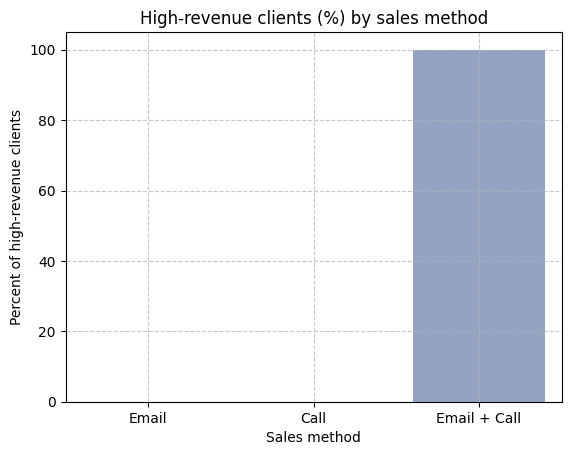

In [ ]:
sns.barplot(
    x='sales_method',
    y='num_clients',
    data=mc,
    order=order,
    hue='sales_method',
    palette=palette,
    legend=False
)

plt.xlabel('Sales method')
plt.ylabel('Percent of high-revenue clients')
plt.title('High-revenue clients (%) by sales method')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

From the barplot, we can see that **all (100%)** high-revenue customers are found exclusively in the combined sales method group, **"Email + Call"**.

### **2.5.9 Compare total revenue from outlier and non-outlier customers in E+C group**

In [ ]:
# Filtering sales method columns for Email + Call group
df_ec = df[df['sales_method'] == 'Email + Call']
hrv_cust_id = outliers['customer_id']

# Calculating revenue sum by outliers and no outliers group
sum_high = df_ec[df_ec['customer_id'].isin(hrv_cust_id)]['revenue'].sum().round(2)
sum_other = df_ec[~df_ec['customer_id'].isin(hrv_cust_id)]['revenue'].sum().round(2)

# Creating a new df
rev_data = {
    'customer_group': ['High-revenue customers', 'Not-high-revenue customers'],
    'revenue': [sum_high, sum_other]
}

rd = pd.DataFrame(rev_data)
rd = rd.rename(columns = {'revenue' : 'Revenue'})

rd_plot = rd.set_index('customer_group').T

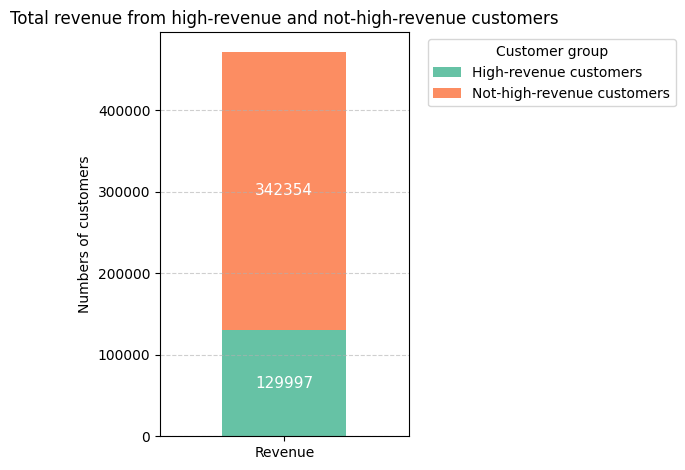

In [ ]:
 ax = rd_plot.plot(
    kind='bar',
    stacked=True,
    color=['#66c2a5', '#fc8d62']
)

plt.title('Total revenue from high-revenue and not-high-revenue customers')
plt.ylabel('Numbers of customers')
plt.xticks(rotation=0)
plt.legend(
    title='Customer group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True
)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()

    if height > 0:
        ax.text(x + width/2, y + height/2,
                f'{height:.0f}',
                ha='center', va='center',
                color='white', fontsize=11)

plt.tight_layout()
plt.show()

### **2.5.10 Top-5 states by overall and high-revenue customers**

In [ ]:
# Finding top 5 states by overall revenue
top5_st_rev = df.groupby('state', observed=False)['revenue'].sum()\
                .sort_values(ascending=False)\
                .reset_index()\
                .head()

top5_st_rev['state'] = top5_st_rev['state'].cat.remove_unused_categories()

top5_st_rev_order = list(top5_st_rev['state'].values)

In [ ]:
# Finding top 5 states in high-revenue customers
top5_state_high_rate_cust = outliers.groupby('state', observed=False)['revenue'].sum()\
                              .sort_values(ascending=False)\
                              .reset_index()\
                              .head()

top5_state_high_rate_cust['state'] = top5_state_high_rate_cust['state'].cat.remove_unused_categories()

top_5_order = list(top5_state_high_rate_cust['state'].values)

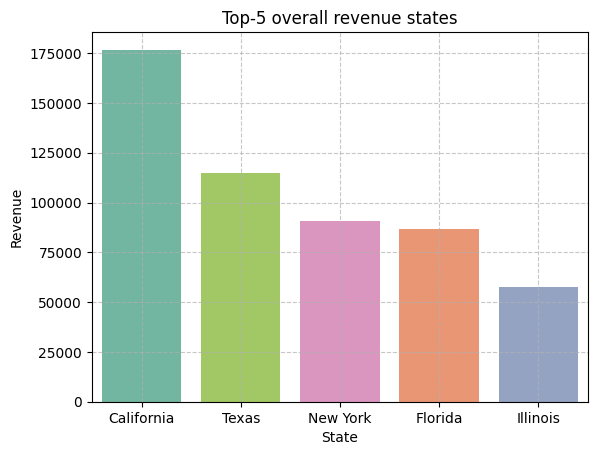

In [ ]:
sns.barplot(
    x='state',
    y='revenue',
    data=top5_st_rev,
    order=top5_st_rev_order,
    hue='state',
    palette='Set2',
    legend=False
)

plt.xlabel('State')
plt.ylabel('Revenue')
plt.title('Top-5 overall revenue states')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

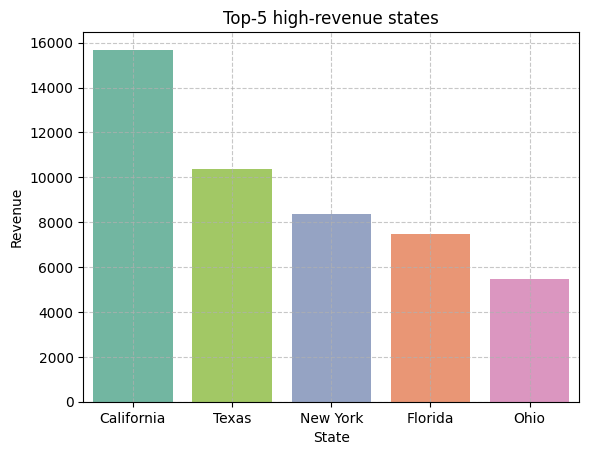

In [ ]:
# Plotting barplot
sns.barplot(
    x='state',
    y='revenue',
    data=top5_state_high_rate_cust,
    order=top_5_order,
    hue='state',
    palette='Set2',
    legend=False
)

plt.xlabel('State')
plt.ylabel('Revenue')
plt.title('Top-5 high-revenue states')
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

plt.show()

Based on the two bar plots, we can conclude that the **top-4 states** are the same for both overall and high-revenue customers. The **only difference** appears in the 5th position: **Illinois** is replaced by **Ohio**.

This suggests that **high-revenue customers in Ohio have a stronger impact** on the national revenue distribution than those in **Illinois**.

# **3. Hypotesis testing**

To validate the insights observed from the plots and make well-grounded conclusions for business decision-making, we need to conduct **A/B testing**.

In this case, our goal is to determine **which sales method generates the highest revenue**.

---

First, we formulate the hypotheses:

- **H₀:** There is no difference in revenue between sales methods.  
- **Hₐ:** There is a difference in revenue between at least two sales methods.

---

We are comparing a **categorical variable** '`sales_method`' (with more than 2 groups) with respect to a **numerical variable** '`revenue`', which makes this a suitable case for a **one-way ANOVA**.

Before applying ANOVA, we must check whether the assumptions are met:

1. **Normality** of the revenue distribution within each group  
2. **Homoscedasticity** (equal variances) across the groups

---

If **ANOVA** reveals statistically significant differences, we will proceed with a **post-hoc pairwise test** to identify which specific groups differ.


## **3.1 Checking normality and homoscedasticity of revenue column**

### **3.1.1 Normality**

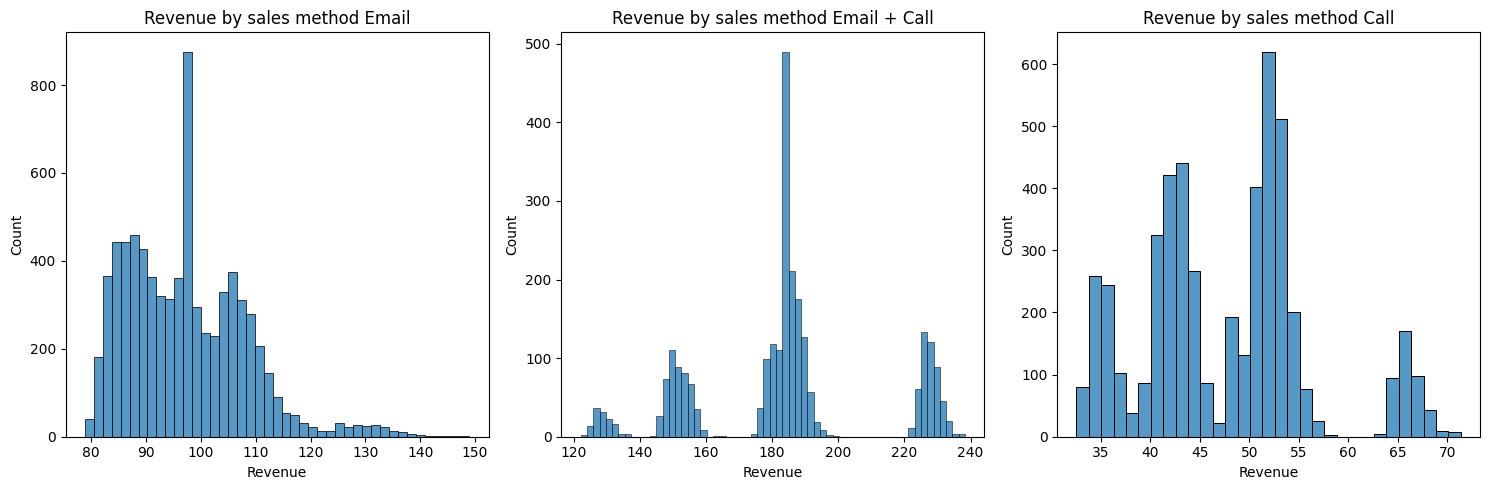

In [ ]:
# Plotting distribution of revenue by sales method
fig, axes = plt.subplots(1, 3, figsize=(15, 5),)

sm = df['sales_method'].unique()

for i, m in enumerate(sm):
    sns.histplot(data=df[df['sales_method'] == m], x='revenue', ax=axes[i])
    axes[i].set_xlabel(f'Revenue')
    axes[i].set_title(f'Revenue by sales method {m}')

plt.tight_layout()
plt.show()

A visual inspection of the histograms for the `'revenue'` column suggests that the data **do not follow a normal distribution**.

---

To confirm this observation, we will perform a normality test using the statistical library *pingouin*.

In [ ]:
# Cheching for normality with pinguoin library method
pg.normality(df, group='sales_method', dv='revenue')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7465.
  res = hypotest_fun_out(*samples, **kwds)


,W,pval,normal
sales_method,,,
Email,0.947412,1.661029e-45,False
Email + Call,0.907439,5.865896e-37,False
Call,0.947181,5.922078e-39,False


As anticipated, the normality test results confirmed that **none of the distributions follow a normal distribution**.

### **3.1.2. Homoscedasticity**

In [ ]:
# Manual homoscedasticity checking
var_by_sm = df.groupby('sales_method', observed=False)['revenue'].var()\
              .reset_index(name='var')

display(var_by_sm)

,sales_method,var
0,Call,71.438482
1,Email,116.531887
2,Email + Call,731.051528


Preliminary analysis shows **large variance differences** between sales groups,  
suggesting potential heteroscedasticity that should be confirmed through formal testing (e.g., Levene’s test).


In [ ]:
# Homoscedasticity
pg.homoscedasticity(data=df, dv='revenue', group='sales_method')

,W,pval,equal_var
levene,1431.112006,0.0,False


The p-value is effectively **0.0**, so we can conclude that there are **significant variance differences** between the sales method groups.  
Therefore, the variances are heteroscedastic.

## **3.2 ANOVA**

In [ ]:
# Checking ANOVA results
anova_res = pg.kruskal(data=df, dv='revenue', between='sales_method')
p_val = anova_res.loc['Kruskal', 'p-unc']

display(anova_res)

,Source,ddof1,H,p-unc
Kruskal,sales_method,2,12521.6642,0.0


In [ ]:
if p_val < .05:
    print(f'p-unc is {p_val:.4f}. There are differents between groups')
else:
    print(f'p-unc is {p_val:.4f}. There are no differents between groups')

p-unc is 0.0000. There are differents between groups


Since the ANOVA test showed statistically significant differences in revenue between groups (p < 0.05), and the assumption of equal variances was **violated** according to Levene's test, we proceed with the **Games-Howell post-hoc test** to identify which groups differ.


## **3.3 Pairwise**

In [ ]:
# Checking differences between sales methods
pw_res = pg.pairwise_gameshowell(
    data=df,
    dv='revenue',
    between='sales_method'
)

display(pw_res)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Call,Email,47.596980,97.127841,-49.530860,0.173235,-285.916760,12096.313553,0.000000e+00,-4.989612
1,Call,Email + Call,47.596980,183.651065,-136.054085,0.546475,-248.966820,2834.334237,2.208234e-13,-7.898886
2,Email,Email + Call,97.127841,183.651065,-86.523225,0.547581,-158.009875,2858.188798,1.595390e-13,-5.226918


Based on the results of the **Games-Howell pairwise comparisons**, all **p-values are extremely low (p < 0.001)**,  
indicating **statistically significant differences** in revenue between all pairs of sales methods.  
**Therefore, the null hypothesis is rejected**, and we accept the alternative:  
**revenue significantly varies depending on the sales method used**.

Among the three groups, the highest average revenue is observed for the **"Email + Call"** method,  
followed by **"Email"**, while the lowest revenue is associated with the **"Call"** method.


# **4. Definition of a metric for the business to monitor**

## **4.1 Business metrics**


Based on the task outlined in the **Introduction**, the main goals of this analysis are:

1.   To contribute to the **overall profit growth** of the company by optimizing the sales strategy.
2.   To identify the **most effective sales method** in terms of revenue generation for a new product launch.

To track progress toward these goals, we propose monitoring the following **key business metrics**:

- **Number of unique customers** – reflects the scale of reach and how many customers was able to engage.
- **Total sales revenue** – the overall income generated from sales; a direct result of customer count and ARPU.
- **Average revenue per customer (ARPC)** – shows how much revenue each customer brings on average; useful for comparing the efficiency of different sales approaches.
- **Number of sold items** – indicates the volume of physical goods sold, which may help explain variations in revenue.
- **Average price per item** – calculated as total revenue divided by the number of sold items; shows how expensive the purchased items are on average.
- **Average number of items sold per customer by group** – useful for understanding purchasing behavior within each sales method group.

## **4.2 Initial values for the business metrics**


### **A - 100% customers to combined "Email + Call" sales method**

In [ ]:
num_c = df['customer_id'].nunique()
total_rev = df['revenue'].sum()
arpc = df['revenue'].mean()
total_sold_items = df['nb_sold'].sum()
avg_price_per_i = total_rev/total_sold_items
avg_item_per_c = total_sold_items/num_c

dfa = pd.DataFrame({
    'num_c': [num_c],
    'total_rev': [total_rev],
    'arpc': [arpc],
    'total_sold_items': [total_sold_items],
    'avg_price_per_i': [avg_price_per_i],
    'avg_item_per_c': [avg_item_per_c]
})

dfa = dfa.round(2)

Based on the current data, the initial values for these metrics are as follows:

- Number of unique customers: **14998**
- Total sales revenue: **1433538.49**
- Average revenue per customer (ARPC): **95.58**
- Number of sold items: **151250**
- Average price per item: **9.48**
- Avg. number of items sold per customer by group: **10.08**

### **B - 80%(from "Email + Call", all "Call" customers, up to 80% customers from "Email" sales method) / 20% rest from "Email" sales method group**

In [ ]:
dfb = df.copy()

c_uniq = len(dfb)
perc = round(c_uniq*.8)
ec_c_cust = dfb[dfb['sales_method'].isin(['Email + Call', 'Call'])].shape[0]
email_sample_num = perc - ec_c_cust
print(c_uniq, perc, ec_c_cust, email_sample_num)

group_a_num = perc
group_b_num = c_uniq - perc

ga_total_rev = []
gb_total_rev = []
ga_arpc = []
gb_arpc = []
ga_nbsold = []
gb_nbsold = []
ga_appi = []
gb_appi = []
ga_aipc = []
gb_aipc = []

for i in range(1000):
  sample_index = dfb[dfb['sales_method'] == 'Email'].sample(n=email_sample_num).index
  group_a = dfb[(dfb['sales_method'].isin(['Email + Call', 'Call'])) ^ (dfb.index.isin(sample_index))]
  group_b = dfb[(dfb['sales_method'] == 'Email') & (~dfb.index.isin(sample_index))]

  group_a_total_rev = group_a['revenue'].sum()
  ga_total_rev.append(group_a_total_rev)
  group_b_total_rev = group_b['revenue'].sum()
  gb_total_rev.append(group_b_total_rev)

  group_a_arpc = group_a['revenue'].mean()
  ga_arpc.append(group_a_arpc)
  group_b_arpc = group_b['revenue'].mean()
  gb_arpc.append(group_b_arpc)

  group_a_nbsold = group_a['nb_sold'].sum()
  ga_nbsold.append(group_a_nbsold)
  group_b_nbsold = group_b['nb_sold'].sum()
  gb_nbsold.append(group_b_nbsold)

  group_a_appi = group_a_total_rev/group_a_nbsold
  ga_appi.append(group_a_appi)
  group_b_appi = group_b_total_rev/group_b_nbsold
  gb_appi.append(group_b_appi)

  group_a_aipc = group_a_nbsold/group_a_num
  ga_aipc.append(group_a_aipc)
  group_b_aipc = group_b_nbsold/group_b_num
  gb_aipc.append(group_b_aipc)

dfb = pd.DataFrame({
    'num_c' : [group_a_num, group_b_num],
    'total_rev' : [round(np.mean(ga_total_rev), 2), round(np.mean(gb_total_rev), 2)],
    'arpc' : [round(np.mean(ga_arpc), 2), round(np.mean(gb_arpc),2)],
    'total_sold_items' : [round(np.mean(ga_nbsold)), round(np.mean(gb_nbsold))],
    'avg_price_per_i'	: [round(np.mean(ga_appi), 2), round(np.mean(gb_appi), 2)],
    'avg_item_per_c' : [round(np.mean(ga_aipc), 2), round(np.mean(gb_aipc), 2)]
}, index=['A', 'B'])

dfb

14998 11998 7533 4465


,num_c,total_rev,arpc,total_sold_items,avg_price_per_i,avg_item_per_c
A,11998,1142137.48,95.19,122060,9.36,10.17
B,3000,291401.01,97.13,29190,9.98,9.73


Based on the current data, the initial values for these metrics are as follows:

- Number of unique customers  
Group A: **11998**  
Group B: **3000**


- Total sales revenue  
Group A: **1142122.96**  
Group B: **291415.53**


- Average revenue per customer (ARPC)  
Group A: **95.19**  
Group B: **97.14**


- Number of sold items  
Group A: **122059**  
Group B: **29191**


- Average price per item  
Group A: **9.36**  
Group B: **9.98**


- Avg. number of items sold per customer by group  
Group A: **10.17**  
Group B: **9.73**

# **5. Conclusion and Business Recommendations**

In [ ]:
pw_res['diff'] = abs(pw_res['diff'])
df_diff = pw_res[['A', 'B', 'diff']]

a_diff_ec_c = df_diff.loc[1, :]['diff']
a_diff_ec_e = df_diff.loc[2, :]['diff']

c_ec_rev_increase = round(df[df['sales_method'] == 'Call'].shape[0] * a_diff_ec_c, 2)
e_ec_rev_increase = round(df[df['sales_method'] == 'Email'].shape[0] * a_diff_ec_e, 2)

a_overall_rev_incrase = c_ec_rev_increase + e_ec_rev_increase

print(a_overall_rev_incrase)

1320860.19


In [ ]:
pw_res['diff'] = abs(pw_res['diff'])
df_diff = pw_res[['A', 'B', 'diff']]

b_diff_ec_c = df_diff.loc[1, :]['diff']
b_diff_ec_e = df_diff.loc[2, :]['diff']

c_ec_rev_increase = round(df[df['sales_method'] == 'Call'].shape[0] * b_diff_ec_c, 2)
e_ec_rev_increase = round((df[df['sales_method'] == 'Email'].shape[0]-3000) * b_diff_ec_e, 2)

b_overall_rev_incrase = c_ec_rev_increase + e_ec_rev_increase

print(b_overall_rev_incrase)

1061290.52


In [ ]:
print(round(a_overall_rev_incrase - b_overall_rev_incrase, 2))

259569.67


The analysis shows that the "Call" method results in the lowest revenue per customer, while the "Email + Call" combination yields the highest. The "Email" method lies in between and offers the advantage of lower resource usage (fewer calls by sales staff).

Based on this, we propose two options:

**Option 1**: Migrate all customers to the "Email + Call" method to maximize revenue.  
However, this may significantly increase the workload for the sales team.

**Option 2 (recommended)**:  
Move all "Call" customers and a portion of "Email" customers to the "Email + Call" method (totaling 80% of customers).  
Keep the remaining 20% in the "Email" group.  
Run an A/B test to evaluate whether maintaining a portion of customers under the "Email-only" strategy is viable.  
This setup will allow the company to balance revenue generation and resource optimization, and to make an informed decision about whether to keep or phase out the "Email-only" sales method.

### Estimated impact on total revenue:

According to rough projections based on the current dataset:

- Implementing **Option 1** (full migration to "Email + Call") is expected to increase total revenue by approximately **1,320,860.19**.
- Implementing **Option 2** (partial migration with an A/B test) would result in an estimated revenue increase of **1,061,290.52**.

This represents a difference of **$259,569.67** in favor of the full migration.  
However, the second approach allows for a more controlled and data-driven transition, minimizing operational risk and providing additional evidence on the long-term viability of the "Email-only" sales strategy.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation